  #         Fraudulent Transactions Predictions

In [1]:
import pandas as pd
import numpy as np

In [2]:
ng=pd.read_csv("Fraud.csv")

In [3]:
ng.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
ng.shape

(6362620, 11)

In [5]:
ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
ng.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Preprocessing


In [7]:
ng.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
ng.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
ng['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
# categories that have most frauds
ng_Fraud_Cash_Out = ng.loc[(ng.isFraud == 1) & (ng.type == 'CASH_OUT')]
ng_Fraud_Payment = ng.loc[(ng.isFraud == 1) & (ng.type == 'PAYMENT')]
ng_Fraud_Cash_in = ng.loc[(ng.isFraud == 1) & (ng.type == 'CASH_IN')]
ng_Fraud_Transfer = ng.loc[(ng.isFraud == 1) & (ng.type == 'TRANSFER')]
ng_Fraud_Debit = ng.loc[(ng.isFraud == 1) & (ng.type == 'DEBIT')]

print(len(ng_Fraud_Cash_Out))
print(len(ng_Fraud_Payment))
print(len(ng_Fraud_Cash_in))
print(len(ng_Fraud_Transfer))
print(len(ng_Fraud_Debit))

4116
0
0
4097
0


In [11]:
#Legit transactions in these categrories
ng_Legit_Cash_Out = ng.loc[(ng.isFraud == 0) & (ng.type == 'CASH_OUT')]
ng_Legit_Transfer = ng.loc[(ng.isFraud == 0) & (ng.type == 'TRANSFER')]

print(len(ng_Legit_Cash_Out))
print(len(ng_Legit_Transfer))

2233384
528812


In [12]:
#here the data is very much unbalanced.
#so for these ngs, I'm randomly selecting a subset of rows from the original ng.

In [13]:
ng1 = ng.loc[(ng.isFraud == 1) & (ng['type'] == 'CASH_OUT')]
ng2 = ng.loc[(ng.isFraud == 1) & (ng['type'] == 'TRANSFER')]
ng3 = ng.loc[(ng.isFraud == 0) & (ng['type'] == 'CASH_OUT')].sample(frac=0.002)
ng4 = ng.loc[(ng.isFraud == 0) & (ng['type'] == 'TRANSFER')].sample(frac=0.008)

In [14]:
newng= pd.concat([ng1,ng2,ng3,ng4])
from sklearn.utils import shuffle
newng= shuffle(newng)

In [15]:
newng

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1294316,136,TRANSFER,387630.26,C1745518985,0.00,0.0,C1307538437,474873.59,862503.86,0,0
3554467,260,TRANSFER,368716.96,C746787141,0.00,0.0,C2020724312,408277.39,776994.35,0,0
6117187,528,TRANSFER,311234.46,C1635920550,311234.46,0.0,C942070496,0.00,0.00,1,0
3596456,262,CASH_OUT,2914653.69,C551410627,2914653.69,0.0,C1503946435,558015.85,3472669.53,1,0
6200560,576,CASH_OUT,511389.50,C399946871,511389.50,0.0,C529880237,0.00,511389.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1871234,164,CASH_OUT,320183.39,C1069162034,0.00,0.0,C536127678,2418877.08,2739060.47,0,0
6020957,466,TRANSFER,230806.85,C549647828,230806.85,0.0,C13373079,0.00,0.00,1,0
6020196,460,TRANSFER,998086.61,C1107781229,998086.61,0.0,C2074418507,0.00,0.00,1,0
5130243,356,TRANSFER,1557677.19,C926148240,0.00,0.0,C1243554532,5204149.02,7053007.31,0,0


In [16]:
newng['isFraud'].value_counts()

0    8697
1    8213
Name: isFraud, dtype: int64

In [17]:
#converting type column to labels with the help of labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(newng['type'])
label

array([1, 1, 1, ..., 1, 1, 0])

In [18]:
# Inserting converted type data into our dataset
newng.insert(2,'type_num', label)

In [19]:
newng.type_num.unique()

array([1, 0])

In [20]:
# there is a character 'c' in the columns of nameOrig & nameDest.
# converting those values into numbers only format
newng['nameOrig'] = newng['nameOrig'].replace({'C': ''}, regex=True)
newng

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1294316,136,TRANSFER,1,387630.26,1745518985,0.00,0.0,C1307538437,474873.59,862503.86,0,0
3554467,260,TRANSFER,1,368716.96,746787141,0.00,0.0,C2020724312,408277.39,776994.35,0,0
6117187,528,TRANSFER,1,311234.46,1635920550,311234.46,0.0,C942070496,0.00,0.00,1,0
3596456,262,CASH_OUT,0,2914653.69,551410627,2914653.69,0.0,C1503946435,558015.85,3472669.53,1,0
6200560,576,CASH_OUT,0,511389.50,399946871,511389.50,0.0,C529880237,0.00,511389.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1871234,164,CASH_OUT,0,320183.39,1069162034,0.00,0.0,C536127678,2418877.08,2739060.47,0,0
6020957,466,TRANSFER,1,230806.85,549647828,230806.85,0.0,C13373079,0.00,0.00,1,0
6020196,460,TRANSFER,1,998086.61,1107781229,998086.61,0.0,C2074418507,0.00,0.00,1,0
5130243,356,TRANSFER,1,1557677.19,926148240,0.00,0.0,C1243554532,5204149.02,7053007.31,0,0


In [21]:
newng['nameDest'] = newng['nameDest'].replace({'C': ''}, regex=True)
newng

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1294316,136,TRANSFER,1,387630.26,1745518985,0.00,0.0,1307538437,474873.59,862503.86,0,0
3554467,260,TRANSFER,1,368716.96,746787141,0.00,0.0,2020724312,408277.39,776994.35,0,0
6117187,528,TRANSFER,1,311234.46,1635920550,311234.46,0.0,942070496,0.00,0.00,1,0
3596456,262,CASH_OUT,0,2914653.69,551410627,2914653.69,0.0,1503946435,558015.85,3472669.53,1,0
6200560,576,CASH_OUT,0,511389.50,399946871,511389.50,0.0,529880237,0.00,511389.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1871234,164,CASH_OUT,0,320183.39,1069162034,0.00,0.0,536127678,2418877.08,2739060.47,0,0
6020957,466,TRANSFER,1,230806.85,549647828,230806.85,0.0,13373079,0.00,0.00,1,0
6020196,460,TRANSFER,1,998086.61,1107781229,998086.61,0.0,2074418507,0.00,0.00,1,0
5130243,356,TRANSFER,1,1557677.19,926148240,0.00,0.0,1243554532,5204149.02,7053007.31,0,0


In [22]:
newng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 1294316 to 2703722
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16910 non-null  int64  
 1   type            16910 non-null  object 
 2   type_num        16910 non-null  int32  
 3   amount          16910 non-null  float64
 4   nameOrig        16910 non-null  object 
 5   oldbalanceOrg   16910 non-null  float64
 6   newbalanceOrig  16910 non-null  float64
 7   nameDest        16910 non-null  object 
 8   oldbalanceDest  16910 non-null  float64
 9   newbalanceDest  16910 non-null  float64
 10  isFraud         16910 non-null  int64  
 11  isFlaggedFraud  16910 non-null  int64  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 1.6+ MB


In [23]:
# converting these values into numeric data
newng['nameDest'] = pd.to_numeric(newng['nameDest'])
newng

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1294316,136,TRANSFER,1,387630.26,1745518985,0.00,0.0,1307538437,474873.59,862503.86,0,0
3554467,260,TRANSFER,1,368716.96,746787141,0.00,0.0,2020724312,408277.39,776994.35,0,0
6117187,528,TRANSFER,1,311234.46,1635920550,311234.46,0.0,942070496,0.00,0.00,1,0
3596456,262,CASH_OUT,0,2914653.69,551410627,2914653.69,0.0,1503946435,558015.85,3472669.53,1,0
6200560,576,CASH_OUT,0,511389.50,399946871,511389.50,0.0,529880237,0.00,511389.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1871234,164,CASH_OUT,0,320183.39,1069162034,0.00,0.0,536127678,2418877.08,2739060.47,0,0
6020957,466,TRANSFER,1,230806.85,549647828,230806.85,0.0,13373079,0.00,0.00,1,0
6020196,460,TRANSFER,1,998086.61,1107781229,998086.61,0.0,2074418507,0.00,0.00,1,0
5130243,356,TRANSFER,1,1557677.19,926148240,0.00,0.0,1243554532,5204149.02,7053007.31,0,0


In [24]:
newng['nameOrig'] = pd.to_numeric(newng['nameOrig'])
newng

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1294316,136,TRANSFER,1,387630.26,1745518985,0.00,0.0,1307538437,474873.59,862503.86,0,0
3554467,260,TRANSFER,1,368716.96,746787141,0.00,0.0,2020724312,408277.39,776994.35,0,0
6117187,528,TRANSFER,1,311234.46,1635920550,311234.46,0.0,942070496,0.00,0.00,1,0
3596456,262,CASH_OUT,0,2914653.69,551410627,2914653.69,0.0,1503946435,558015.85,3472669.53,1,0
6200560,576,CASH_OUT,0,511389.50,399946871,511389.50,0.0,529880237,0.00,511389.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1871234,164,CASH_OUT,0,320183.39,1069162034,0.00,0.0,536127678,2418877.08,2739060.47,0,0
6020957,466,TRANSFER,1,230806.85,549647828,230806.85,0.0,13373079,0.00,0.00,1,0
6020196,460,TRANSFER,1,998086.61,1107781229,998086.61,0.0,2074418507,0.00,0.00,1,0
5130243,356,TRANSFER,1,1557677.19,926148240,0.00,0.0,1243554532,5204149.02,7053007.31,0,0


In [25]:
#dropping the unwanted columns
#also dropping the target variable
Data1=newng.drop(columns =['type','isFraud'])

In [26]:
Data1

,step,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
1294316,136,1,387630.26,1745518985,0.00,0.0,1307538437,474873.59,862503.86,0
3554467,260,1,368716.96,746787141,0.00,0.0,2020724312,408277.39,776994.35,0
6117187,528,1,311234.46,1635920550,311234.46,0.0,942070496,0.00,0.00,0
3596456,262,0,2914653.69,551410627,2914653.69,0.0,1503946435,558015.85,3472669.53,0
6200560,576,0,511389.50,399946871,511389.50,0.0,529880237,0.00,511389.50,0
...,...,...,...,...,...,...,...,...,...,...
1871234,164,0,320183.39,1069162034,0.00,0.0,536127678,2418877.08,2739060.47,0
6020957,466,1,230806.85,549647828,230806.85,0.0,13373079,0.00,0.00,0
6020196,460,1,998086.61,1107781229,998086.61,0.0,2074418507,0.00,0.00,0
5130243,356,1,1557677.19,926148240,0.00,0.0,1243554532,5204149.02,7053007.31,0


In [27]:
y=newng.isFraud
y

1294316    0
3554467    0
6117187    1
3596456    1
6200560    1
          ..
1871234    0
6020957    1
6020196    1
5130243    0
2703722    1
Name: isFraud, Length: 16910, dtype: int64

In [28]:
#Irrelevant or partially relevant features can negatively impact model performance.
#so using feature importance here
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Data1,y)

ExtraTreesClassifier()

In [29]:
print(model.feature_importances_)

[0.17733703 0.03164674 0.12248246 0.01755953 0.36568427 0.03681282
 0.01707171 0.09571317 0.13520962 0.00048267]


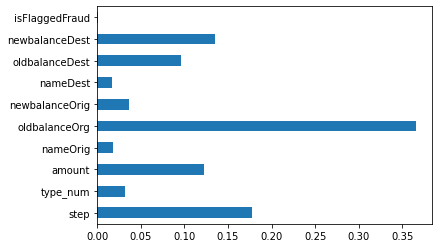

In [30]:
#ploting graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=Data1.columns)
feature_importances.plot(kind='barh')
plt.show()

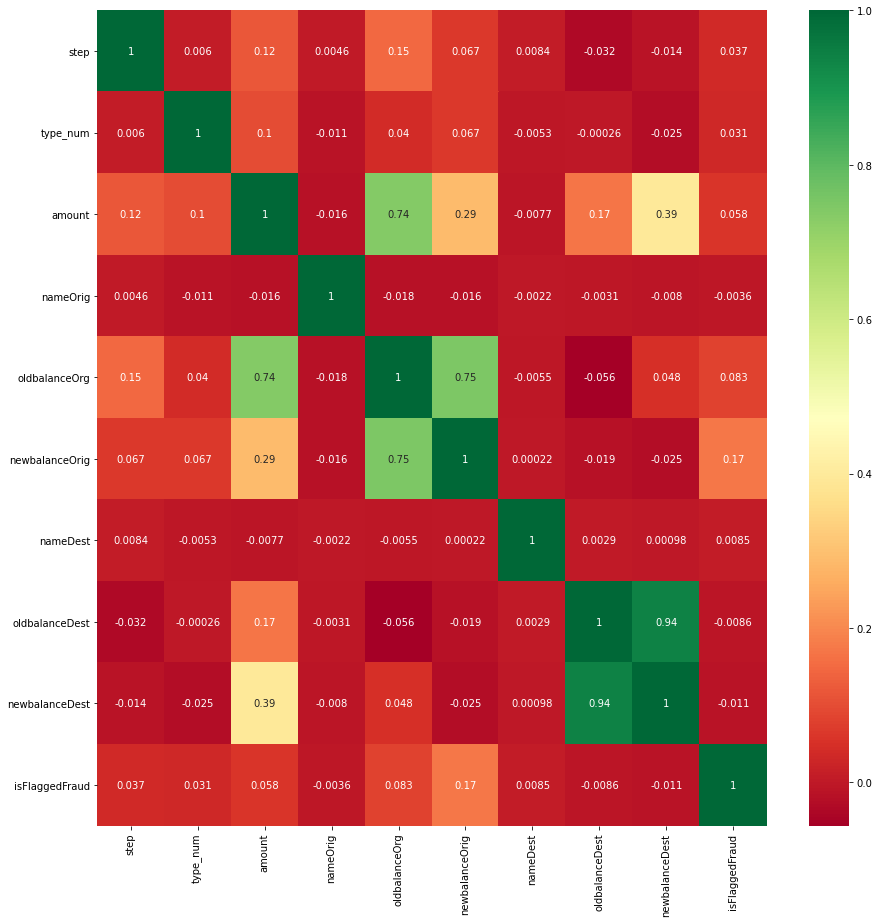

In [31]:
#checking the correlation also
import seaborn as sns
corrmat = Data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(Data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
#from above plots, it is clear that the features "nameOrig","nameDest","isFlaggedFraud" doesn't play a major role in decision making
#basically the feauters "nameOrig","nameDest" are just some string values which has no significance to our data
X= Data1.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [33]:
X

,step,type_num,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1294316,136,1,387630.26,0.00,0.0,474873.59,862503.86
3554467,260,1,368716.96,0.00,0.0,408277.39,776994.35
6117187,528,1,311234.46,311234.46,0.0,0.00,0.00
3596456,262,0,2914653.69,2914653.69,0.0,558015.85,3472669.53
6200560,576,0,511389.50,511389.50,0.0,0.00,511389.50
...,...,...,...,...,...,...,...
1871234,164,0,320183.39,0.00,0.0,2418877.08,2739060.47
6020957,466,1,230806.85,230806.85,0.0,0.00,0.00
6020196,460,1,998086.61,998086.61,0.0,0.00,0.00
5130243,356,1,1557677.19,0.00,0.0,5204149.02,7053007.31


In [34]:
y

1294316    0
3554467    0
6117187    1
3596456    1
6200560    1
          ..
1871234    0
6020957    1
6020196    1
5130243    0
2703722    1
Name: isFraud, Length: 16910, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
# the range of values for each feauters is widely scattered. so performed feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Preprocessing is Done.
### dataset is ready for classification

#### Using Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1730
           1       0.93      0.87      0.90      1652

    accuracy                           0.90      3382
   macro avg       0.91      0.90      0.90      3382
weighted avg       0.91      0.90      0.90      3382



Text(69.0, 0.5, 'Truth')

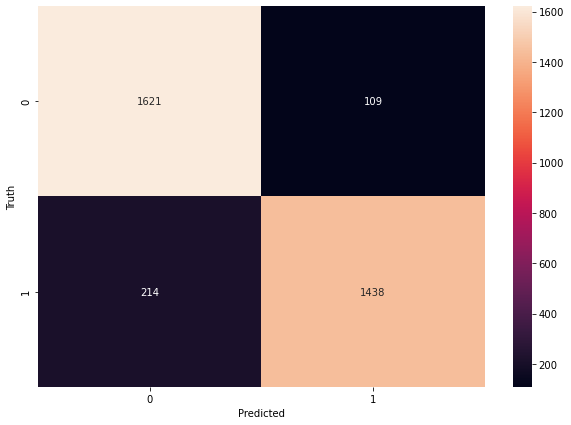

In [40]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### using Naive bayes


In [42]:
from sklearn.naive_bayes import GaussianNB
sa= GaussianNB()
sa.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = sa.predict(X_test)

In [44]:
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      1730
           1       0.94      0.53      0.68      1652

    accuracy                           0.75      3382
   macro avg       0.81      0.75      0.74      3382
weighted avg       0.81      0.75      0.74      3382



Text(69.0, 0.5, 'Truth')

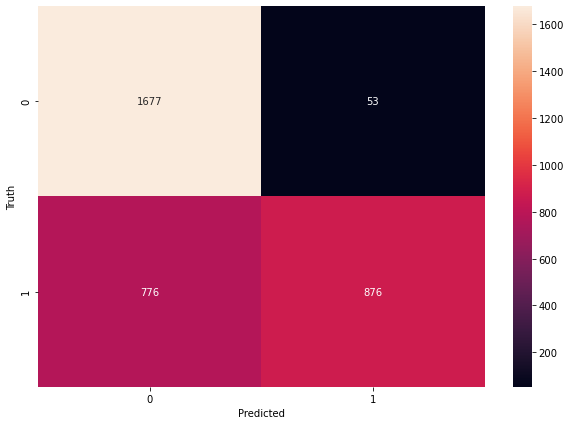

In [46]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### USING SVM


In [47]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [48]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1730
           1       0.93      0.87      0.90      1652

    accuracy                           0.91      3382
   macro avg       0.91      0.91      0.91      3382
weighted avg       0.91      0.91      0.91      3382



Text(69.0, 0.5, 'Truth')

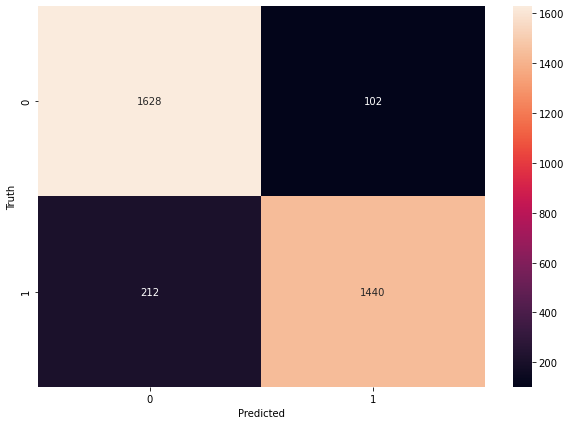

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

####  using Decision tree


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1730
           1       0.99      1.00      0.99      1652

    accuracy                           0.99      3382
   macro avg       0.99      1.00      0.99      3382
weighted avg       0.99      0.99      0.99      3382



Text(69.0, 0.5, 'Truth')

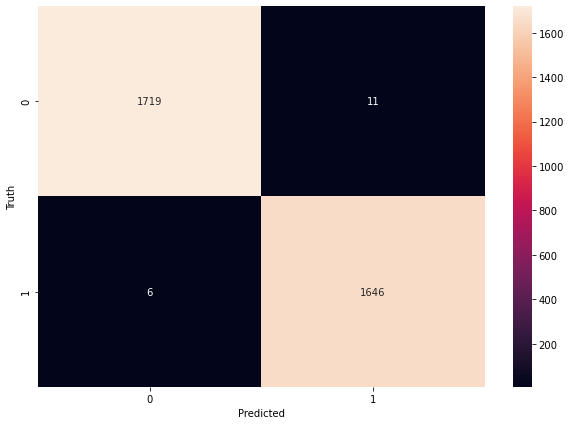

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1730
           1       0.99      1.00      0.99      1652

    accuracy                           0.99      3382
   macro avg       0.99      0.99      0.99      3382
weighted avg       0.99      0.99      0.99      3382



Text(69.0, 0.5, 'Truth')

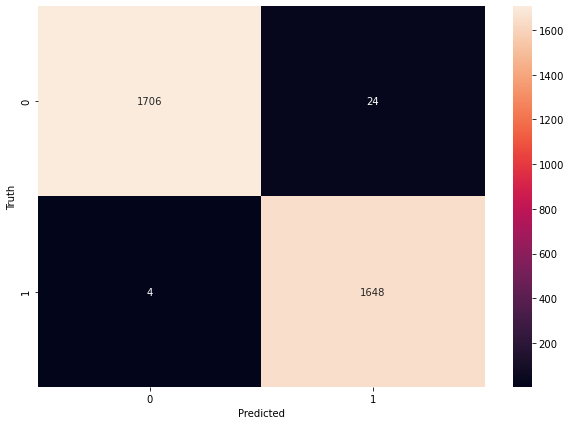

In [58]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Question And The Answers



### 1. Data cleaning including missing values, outliers and multi-collinearity. 


#### There was no missing values present in the dataset, when I went through the dataset,it was not balanced. The value count for fraudulent transfer and Legit transfer had a big difference. So I randomly selected a subset of rows from the dataframe(NG) and used label encoders to convert the type feature, then converted the nameOrig & nameDest features to int by removing the character and convert it to numeric, after that to check the feature imporatance scaled the complete features. Here, this is a classification problem so multicolinearity won't be much of an issue ,still I have implemented Decision tree and Random forest in model creation part, so as to eliminate multi-colinearity


### 2. Describe your fraud detection model in elaboration. 

#### I used multiple classification models like logistic regression(90%), naive bayes(74%), svm(91%), Decision tree, Random Forest. out of these model Decision tree and random forest got the highest accuracy on test data. Thus, according to me, my model genaralized multicolinearity. Only naive bayes provided an accuracy(74%) which was low, and I already knew that in my mind.

### 3. How did you select variables to be included in the model?

#### Irrelevant or partially relevant features can have negative impact on model performance, thus by using feature importance here and plotted these values just for the visualization was enough to understand what are the necessary features. By thinking logically we can understand the important features. The features "nameOrig" & "nameDest" are just some string values for representing the customers, which has no any significance to our data.

### 4. Demonstrate the performance of the model by using best set of tools. 


#### I applied classification_report method of sklearn.metrics library to evaluate the model. plotted the confusion matrix also to easily understand how well my model is performing.

### 5. What are the key factors that predict fraudulent customer? 

#### The most important factors that predict fraudulent customer are initial balance recipient before the transaction and new balance recipient after the transaction.(oldbalanceDest  and newbalanceDest  ).

### 6. Do these factors make sense? If yes, How? If not, How not? 

#### Yes, they have relevance, as these values are highly correlated to each other. If there is a chance of an account with good initial balance went suddenly to a low balance. Then there is a high chance of that transaction being a fraudulent one.

### 7. What kind of prevention should be adopted while company update its infrastructure?

#### The company should keep track of account activities more frequently, and there has to be more rules of verification to complete a transaction to reduce such frauds and whenever it finds a huge transaction happened or account got emptied give a special check on that transaction by putting a withrawal limit may hinder these transactions.

### 8. Assuming these actions have been implemented, how would you determine if they work?

#### Do a checkup on weekly basis find all the fradulent transaction happended in each week and make a summary for the month end. if the fraudulent transaction decreased in each week ,then our actions are working else, we need to update the strategy.